In [1]:
import scvelo as scv
import scanpy as sc
import os 
from pathlib import Path
import numpy as np 
import pandas as pd 
from anndata import AnnData


In [2]:
notebook_dir = os.getcwd()
notebook_dir

'c:\\Users\\OmerCagatayTalikaci\\Desktop\\github\\STVelo\\notebooks\\metrics'

In [3]:
Path(notebook_dir).parents[2]

WindowsPath('c:/Users/OmerCagatayTalikaci/Desktop/github')

In [4]:
os.chdir(Path(notebook_dir).parents[2])

In [6]:
adata = scv.read("data/simulated/adata_simulated_3ode.h5ad")

# Preprocessing 

In [7]:
sc.pp.filter_cells(adata,min_counts = 20)
sc.pp.filter_genes(adata,min_cells = 4)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,n_neighbors = 23  ,n_pcs=0)
sc.tl.umap(adata, min_dist=1)
sc.tl.leiden(adata)

In [9]:
adata

AnnData object with n_obs × n_vars = 800 × 300
    obs: 'true_t', 'n_counts', 'leiden'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'nucleic', 'spliced', 'spliced_cyto', 'spliced_nuc', 'unspliced'
    obsp: 'distances', 'connectivities'

# Velocity with spliced-unspliced

## Deterministic Velocity 
- adata_s_u_det

In [10]:
adata_s_u_det = adata.copy()

In [11]:
scv.pp.moments(adata_s_u_det, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
scv.tl.velocity(adata_s_u_det, mode='deterministic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [13]:
scv.tl.velocity_graph(adata_s_u_det)

computing velocity graph (using 1/24 cores)


  0%|          | 0/800 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [14]:
adata_s_u_det.var.columns

Index(['true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma',
       'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio',
       'velocity_r2', 'velocity_genes'],
      dtype='object')

## Stochastic Velocity

In [15]:
adata_s_u_dyn = adata.copy()

In [16]:
scv.pp.moments(adata_s_u_dyn, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
scv.tl.recover_dynamics(adata_s_u_dyn,n_jobs=8)

recovering dynamics (using 8/24 cores)


  0%|          | 0/228 [00:00<?, ?gene/s]

    finished (0:00:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [18]:
scv.tl.velocity(adata_s_u_dyn, mode='dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [19]:
scv.tl.velocity_graph(adata_s_u_dyn)

computing velocity graph (using 1/24 cores)


  0%|          | 0/800 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


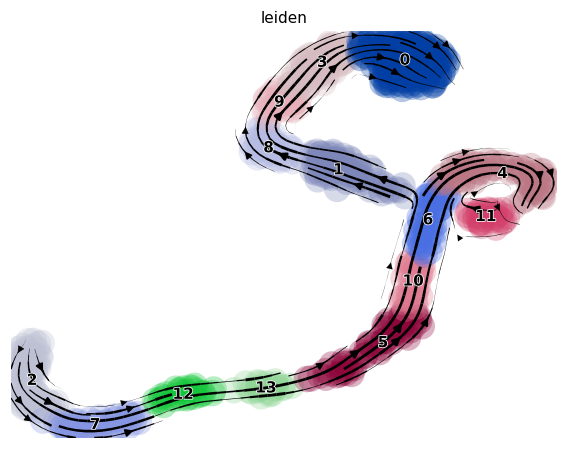

In [20]:
scv.pl.velocity_embedding_stream(adata_s_u_dyn, basis='umap',color="leiden", dpi=110)

# Velocity - nucleus -cyto

## Deterministic Velocity 

In [21]:
adata_n_c_det = adata.copy()

In [22]:
adata_n_c_det

AnnData object with n_obs × n_vars = 800 × 300
    obs: 'true_t', 'n_counts', 'leiden'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'nucleic', 'spliced', 'spliced_cyto', 'spliced_nuc', 'unspliced'
    obsp: 'distances', 'connectivities'

In [23]:
adata_n_c_det.layers["unspliced"]= adata_n_c_det.layers["nucleic"]
adata_n_c_det.layers["spliced"]= adata_n_c_det.layers["spliced_cyto"]

In [24]:
scv.pp.moments(adata_n_c_det, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
scv.tl.velocity(adata_n_c_det, mode='deterministic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [26]:
scv.tl.velocity_graph(adata_n_c_det)

computing velocity graph (using 1/24 cores)


  0%|          | 0/800 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


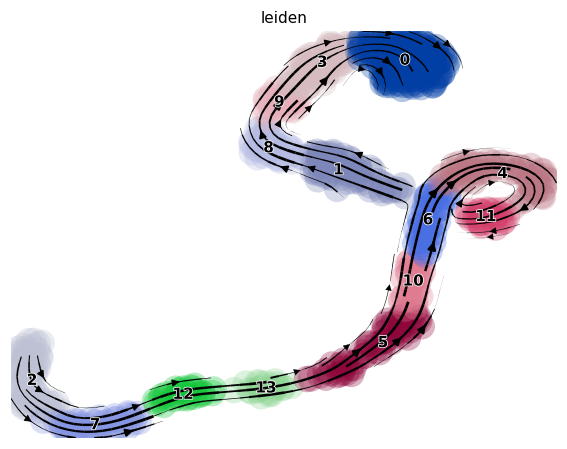

In [27]:
scv.pl.velocity_embedding_stream(adata_n_c_det, basis='umap',color="leiden", dpi=110)

## Dynamical Velocity 

In [28]:
adata_n_c_dyn = adata.copy()

In [29]:
adata_n_c_dyn.layers["unspliced"]= adata_n_c_dyn.layers["nucleic"]
adata_n_c_dyn.layers["spliced"]= adata_n_c_dyn.layers["spliced_cyto"]

In [30]:
scv.tl.recover_dynamics(adata_n_c_dyn, n_jobs=8)

recovering dynamics (using 8/24 cores)


  0%|          | 0/300 [00:00<?, ?gene/s]

    finished (0:00:03) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [31]:
scv.tl.velocity(adata_n_c_dyn, mode='dynamical')

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [32]:
scv.tl.velocity_graph(adata_n_c_dyn)

computing velocity graph (using 1/24 cores)


  0%|          | 0/800 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


c:\Users\OmerCagatayTalikaci\anaconda3\envs\scvelo\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\OmerCagatayTalikaci\anaconda3\envs\scvelo\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


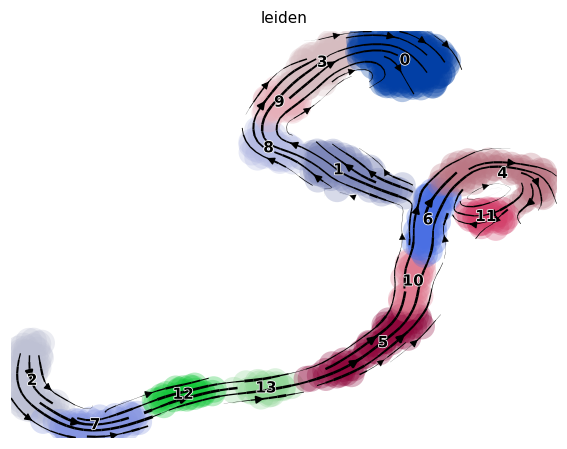

In [33]:
scv.pl.velocity_embedding_stream(adata_n_c_dyn, basis='umap',color="leiden", dpi=110)

In [34]:
alldata = {}
alldata['adata_n_c_det'] = adata_n_c_det
alldata['adata_s_u_det'] = adata_s_u_det
alldata['adata_n_c_dyn'] = adata_n_c_dyn
alldata['adata_s_u_dyn'] = adata_s_u_dyn

In [35]:
np.save('data/simulated/data_dict_with_velocity_det_dyn_3ode.npy', alldata) 